An analysis of paleo-present climate data
• Analyse CO2 vs Temperature Anomaly from 800kyrs – present.


In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CO2 data from Luthi et al. 2008 Nature Paper

In [285]:
url='CO2 data from Luthi et al. 2008 Nature Paper .xls'
sheet_name = '3.  Composite CO2'
CO2_NP_df = pd.read_excel(url, sheet_name, skiprows=6, index_col=None)
CO2_NP_df.rename(columns={'EDC3_gas_a (yr)': 'year', 
'CO2 (ppmv)': 'CO2_NP (ppmv)'}, inplace=True)
CO2_NP_df['year'] = CO2_NP_df['year'].astype(float)

In [286]:

print(CO2_NP_df.head())
print("------")
print("shape:", CO2_NP_df.shape)


    year  CO2_NP (ppmv)
0  137.0          280.4
1  268.0          274.9
2  279.0          277.9
3  395.0          279.1
4  404.0          281.9
------
shape: (1096, 2)


<AxesSubplot:xlabel='year'>

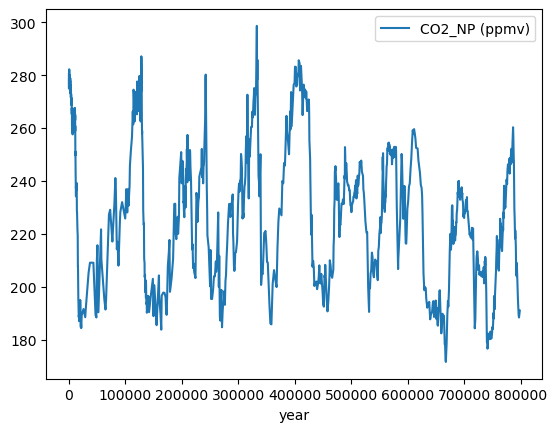

In [287]:
x= ("year")
y= ("CO2_NP (ppmv)")
CO2_NP_df.plot(x, y)


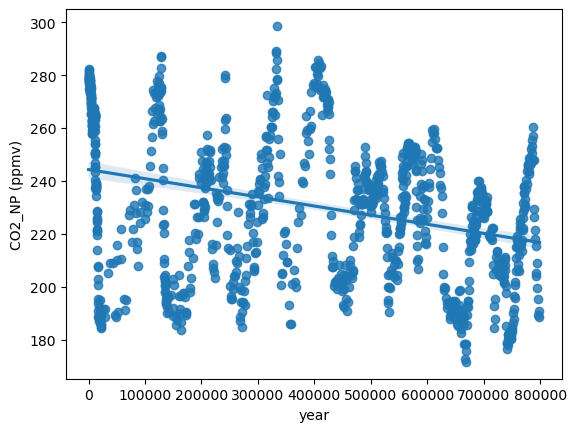

In [288]:


sns.regplot(x="year", y="CO2_NP (ppmv)", data= CO2_NP_df)
plt.show()

CO2 data from IPCC Report

In [289]:
url = 'CO2 data from IPCC Report .xls'
CO2_IPCC_df = pd.read_excel(url, sheet_name='CO2 Composite', skiprows=14)
CO2_IPCC_df.drop('sigma mean CO2 (ppmv)', axis=1, inplace=True)

CO2_IPCC_df.rename(columns={'Gasage (yr BP) ': 'year', 
'CO2 (ppmv)': 'CO2_IPCC (ppmv)'}, inplace=True)

In [290]:
print(CO2_IPCC_df.head())
print("------")
print("shape:", CO2_IPCC_df.shape)

        year  CO2_IPCC (ppmv)
0 -51.030000       368.022488
1 -48.000000       361.780737
2 -46.279272       359.647793
3 -44.405642       357.106740
4 -43.080000       353.946685
------
shape: (1901, 2)


<AxesSubplot:xlabel='year'>

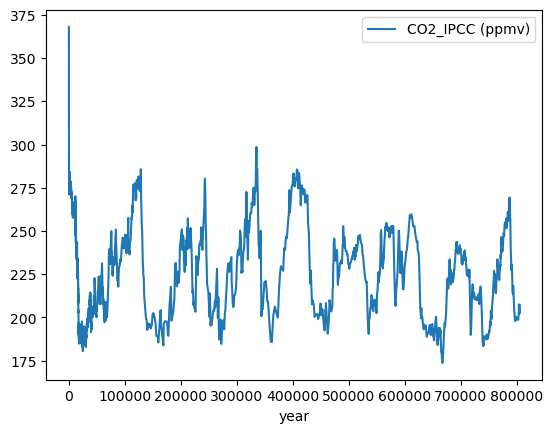

In [291]:

CO2_IPCC_df.plot(x="year", y="CO2_IPCC (ppmv)")

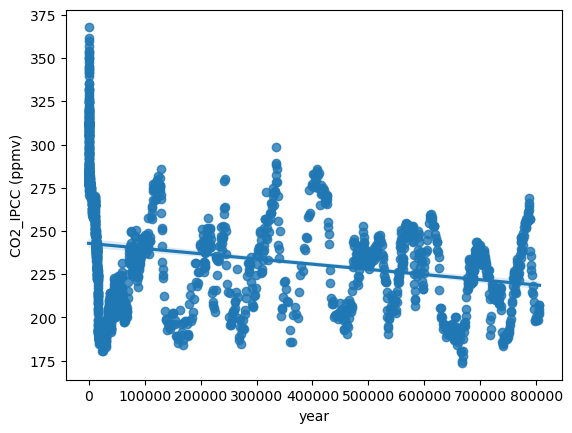

In [292]:
sns.regplot(x="year", y="CO2_IPCC (ppmv)", data= CO2_IPCC_df)
plt.show()

Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC

In [293]:
url='Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC.xls'
Temp_Jouzel_df = pd.read_excel(url)
Temp_Jouzel_df.drop('ztop', axis=1, inplace=True)
Temp_Jouzel_df.drop('bag', axis=1, inplace=True)
Temp_Jouzel_df.drop('deutfinal', axis=1, inplace=True)
Temp_Jouzel_df.drop('acc-EDC3beta', axis=1, inplace=True)
Temp_Jouzel_df.drop('EDC3béta', axis=1, inplace=True)
Temp_Jouzel_df.rename(columns={'AICC2012': 'year','temp':'temp_Jouzel'}, inplace=True)

In [294]:
print(Temp_Jouzel_df.head())
print("------")
print("shape:", Temp_Jouzel_df.shape)

        year  temp_Jouzel
0 -55.000000        218.3
1 -50.513333        218.3
2 -46.026667        218.3
3 -41.540000        218.3
4 -34.516667        218.3
------
shape: (5819, 2)


<AxesSubplot:xlabel='year'>

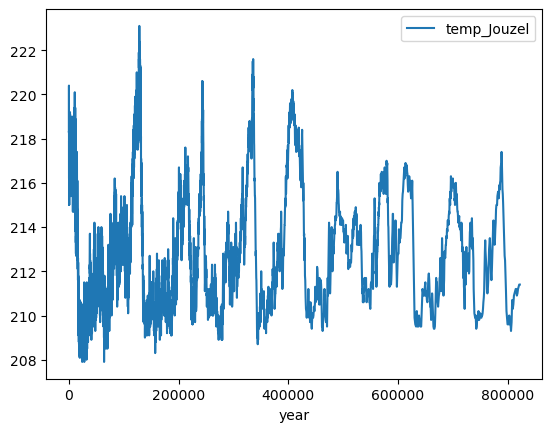

In [318]:

Temp_Jouzel_df.plot(x="year", y="temp_Jouzel")


Temperature Data from NOAA

In [296]:
#url='Temperature Data from NOAA.txt'
Temp_NOAA_df = pd.read_csv('Temperature Data from NOAA.txt',sep='\s+', skiprows=91, index_col=None)
Temp_NOAA_df.drop('Bag', axis=1, inplace=True)
Temp_NOAA_df.drop('ztop', axis=1, inplace=True)
Temp_NOAA_df.drop('Deuterium', axis=1, inplace=True)
Temp_NOAA_df.rename(columns={'Age': 'year', 
'Temperature': 'temp_NOAA'}, inplace=True)

In [297]:
print(Temp_NOAA_df.head())
print("------")
print("shape:", Temp_NOAA_df.shape)

       year  temp_NOAA
0 -50.00000        NaN
1 -43.54769        NaN
2 -37.41829        NaN
3 -31.61153        NaN
4 -24.51395        NaN
------
shape: (5800, 2)


<AxesSubplot:xlabel='year'>

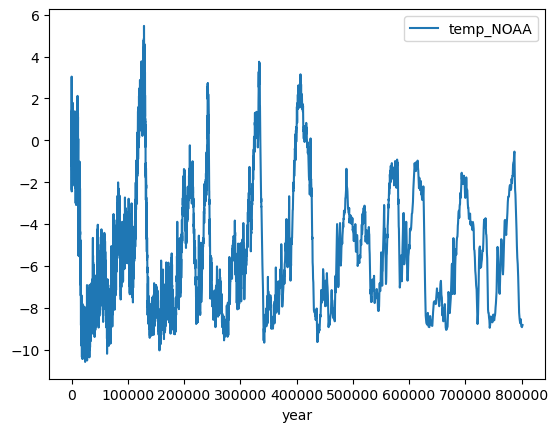

In [298]:
Temp_NOAA_df.plot(x="year", y="temp_NOAA")

• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)


Sea Level.


Global Average Absolute Sea Level Change, 1880-2021",,,,
Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,,,,
"Data source: CSIRO, 2017; NOAA, 2022",,,,
Web update: July 2022,,,,
Units: inches,,,,

In [331]:
url= 'sea-level_fig-1.csv'
sea_level_df=pd.read_csv(url ,skiprows=6)
sea_level_df['Year'] = sea_level_df['Year'].astype(float)

In [332]:
print(sea_level_df.head())
print("------")
print("shape:", sea_level_df.shape)

     Year  CSIRO - Adjusted sea level (inches)  \
0  1880.0                             0.000000   
1  1881.0                             0.220472   
2  1882.0                            -0.440945   
3  1883.0                            -0.232283   
4  1884.0                             0.590551   

   CSIRO - Lower error bound (inches)  CSIRO - Upper error bound (inches)  \
0                           -0.952756                            0.952756   
1                           -0.732283                            1.173228   
2                           -1.346457                            0.464567   
3                           -1.129921                            0.665354   
4                           -0.283465                            1.464567   

   NOAA - Adjusted sea level (inches)  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 Na

<AxesSubplot:xlabel='Year'>

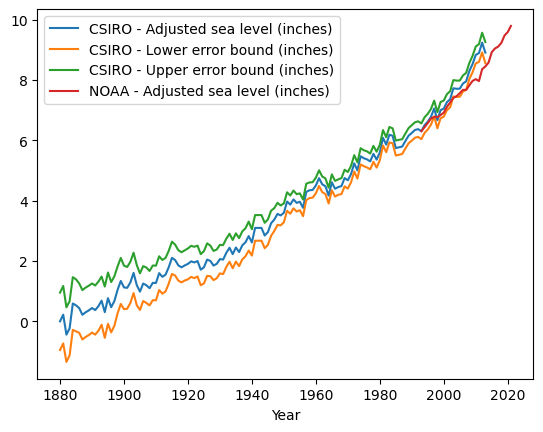

In [320]:

df = sea_level_df.set_index('Year')
df.plot()

<AxesSubplot:xlabel='Year'>

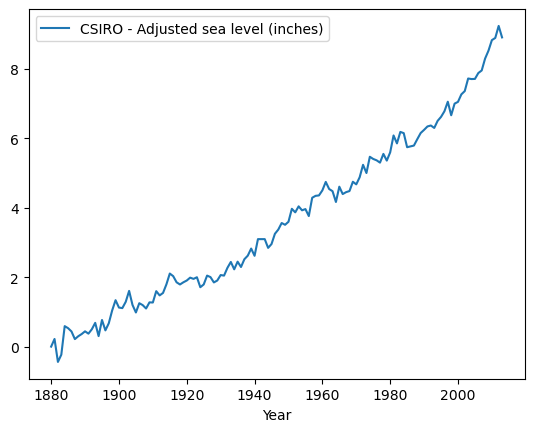

In [321]:
sea_level_df.plot(x="Year", y="CSIRO - Adjusted sea level (inches)")

In [323]:
print(sea_level_df.head())
print("------")
print("shape:", sea_level_df.shape)

   year  sea level_CSIRO
0  1880         0.000000
1  1881         0.220472
2  1882        -0.440945
3  1883        -0.232283
4  1884         0.590551
------
shape: (142, 2)


Global Sea Level Reconstruction using Stacked Records from 0-800 ka
#-----------------------------------------------------------------------
#               World Data Center for Paleoclimatology, Boulder
#                                   and
#                      NOAA Paleoclimatology Program

• Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)


Composite Rainfall Time Series from 1711-2016 for Ireland
"A continuous 305-year (1711-2016) monthly rainfall series has been created for the Island of Ireland using two key data sources, i) a previously unpublished UK Meteorological Office Note which contains annual rainfall anomalies and corresponding proportional monthly totals based on weather diaries and early observational records for the period 1711-1977 and, ii) a long-term, homogenised monthly rainfall series for the island for the period 1850-2016." https://www.met.ie/climate/available-data/long-term-data-sets/#MonthlyIIP

https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.4522

In [302]:
url='Composite Rainfall Time Series from 1711-2016 for Ireland.CSV'
irish_rainfall_df=pd.read_csv(url)

In [303]:
print(irish_rainfall_df.head())
print("------")
print("shape:", irish_rainfall_df.shape)

   Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1
2  1711      3                 121.2
3  1711      4                  85.2
4  1711      5                  66.6
------
shape: (3672, 3)


<AxesSubplot:xlabel='Year'>

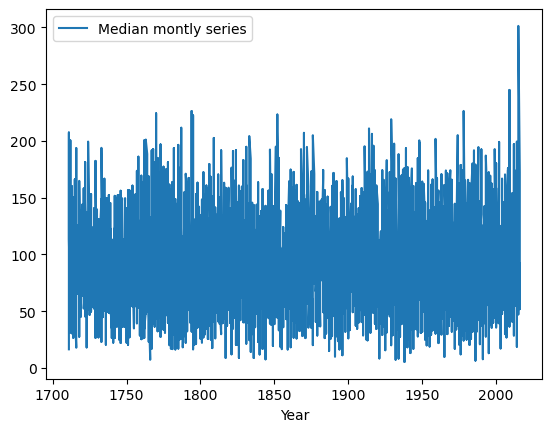

In [304]:
irish_rainfall_df.plot(x="Year", y="Median montly series")

Phoenix Park Dublin
i. Phoenix Park Dublin_1831-1958.CSV
 Once daily observations.
IRELAND LONG-TERM MAXIMUM AND MINIMUM AIR TEMPERATURE 
DATASET (ILMMT)
DATASET INFORMATION
If using this dataset please cite:
Mateus, C., Potito, A., Curley, M. 2020. Reconstruction of a long-term historical daily 
maximum and minimum air temperature network dataset for Ireland (1831-1968). 
Geoscience Data Journal. 00:1–14. https://doi.org/10.1002/gdj3.92

https://rmets.onlinelibrary.wiley.com/doi/10.1002/gdj3.92

In [305]:
url='Phoenix Park Dublin_1831-1958.csv'
irish_temp_df=pd.read_csv(url)

In [306]:
print(irish_temp_df.head())
print("------")
print("shape:", irish_temp_df.shape)

   Year  Month  Day  Max (F)  Min (F)  Max (C)  Min (C)
0  1831      1    1      NaN      NaN      NaN      NaN
1  1831      1    2      NaN      NaN      NaN      NaN
2  1831      1    3      NaN      NaN      NaN      NaN
3  1831      1    4      NaN      NaN      NaN      NaN
4  1831      1    5      NaN      NaN      NaN      NaN
------
shape: (46751, 7)


<AxesSubplot:xlabel='Year'>

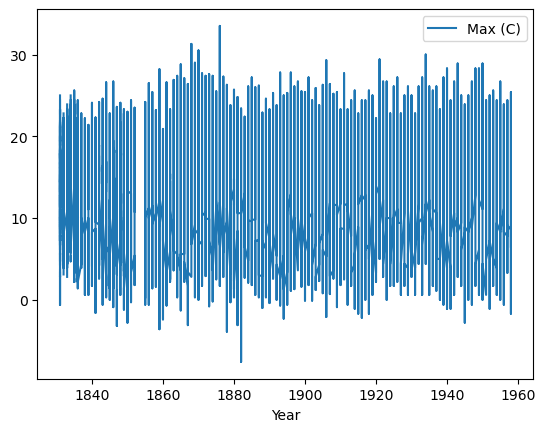

In [307]:

irish_temp_df.plot(x="Year", y="Max (C)")

• Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats


In [325]:

CO2_merge_df= pd.merge(CO2_NP_df, CO2_IPCC_df, on="year", how="outer")
temp_merge_df= pd.merge(Temp_NOAA_df, Temp_Jouzel_df, on="year", how="outer")
merge_df= pd.merge(CO2_merge_df, temp_merge_df, on="year", how="outer")
sea_level_merge_df=pd.merge(merge_df, sea_level_df, on="year", how="outer")


c:\Users\knuto\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [324]:
print(sea_level_merge_df.head())
print("------")
print("shape:", merge_df.shape)

NameError: name 'sea_level_merge_df' is not defined

• For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).


<AxesSubplot:xlabel='year'>

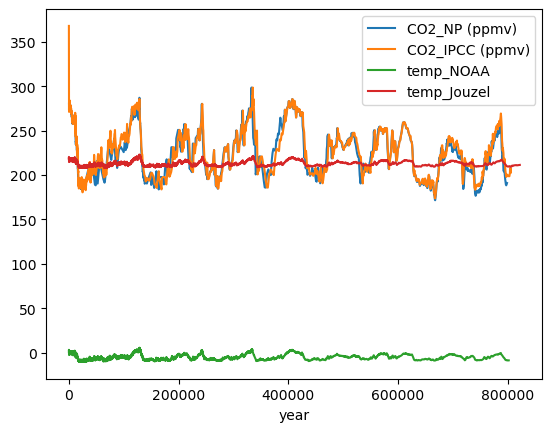

In [310]:

df = merge_df.set_index('year')
df.plot()

• Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue


• Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)


References
https://www.epa.gov/climate-indicators/climate-change-indicators-sea-level
Link to CO2 data from Luthi et al. 2008 Nature Paper 
Link to CO2 data from IPCC Report (Link below) 
epicaDC.deuttemp.EDC3-AICC.xls 
Temperature Data from NOAA https://www.ncei.noaa.gov/access/paleo-search/study/6080
https://www.met.ie/climate/available-data/long-term-data-sets/

https://www.sciencedirect.com/science/article/pii/S2212094723000610

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.4522



